In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
users = pd.read_csv('/content/drive/MyDrive/ml-1m/users.dat', sep='::',engine='python',
                        names=['userid', 'gender', 'age', 'occupation', 'zip'])

ratings = pd.read_csv('/content/drive/MyDrive/ml-1m/ratings.dat', engine='python',
                          sep='::', names=['userid', 'movieid', 'rating', 'timestamp'])

movies = pd.read_csv('/content/drive/MyDrive/ml-1m/movies.dat', engine='python',
                         sep='::', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False)

In [ ]:
mintime = min(ratings.timestamp)
maxtime = max(ratings.timestamp)

In [ ]:
movies_list = [movie for movie in ratings.movieid.unique() if len(ratings[ratings.movieid == movie].userid.unique()) >= 5]
ratings = ratings[ratings.movieid.isin(movies_list)]

top_users = ratings.userid.value_counts().nlargest(1000)
ratings = ratings[ratings.userid.isin(top_users.index)]

In [ ]:
le_user = le_item = LabelEncoder()
le_user.fit(ratings.userid.to_numpy())
ratings.userid = le_user.transform(ratings.userid)

le_item.fit(ratings.movieid.to_numpy())
ratings.movieid = le_item.transform(ratings.movieid)

In [ ]:
ratings['fav'] = ratings.rating.apply(
    lambda x: 1 if x > 3 else 0
)

In [ ]:
user_list = ratings.userid.unique()
ui = {}

with open('user_item.txt', 'w') as f:
  for user in tqdm(user_list):
    movie_list = ratings[(ratings.userid == user)].movieid.unique()
    ui[user] = movie_list
    for movie in movie_list:
      f.write(f'{user}\t{movie}\n')

100%|██████████| 1000/1000 [00:02<00:00, 476.01it/s]


In [ ]:
# mintime = min(ratings.timestamp)
# maxtime = max(ratings.timestamp)
# ratings['timestamp_norm'] = ratings.timestamp.apply(
#     lambda x: x - mintime
# )

In [ ]:
# year_time = 365 * 24 * 60 * 60
# month_time = 30 * 24 * 60 * 60
# week_time = 7 * 24 * 60 * 60
# three_day = 3 * 24 * 60 * 60
# one_day = 24 * 60 * 60

# ratings['year'] = ratings.timestamp_norm.apply(
#     lambda x: int(x/year_time) + 1
# )
# ratings['month'] = ratings.timestamp_norm.apply(
#     lambda x: int(x/month_time) + 1
# )
# ratings['week'] = ratings.timestamp_norm.apply(
#     lambda x: int(x/week_time) + 1
# )
# ratings['three_days'] = ratings.timestamp_norm.apply(
#     lambda x: int(x/three_day) + 1
# )
# ratings['one_day'] = ratings.timestamp_norm.apply(
#     lambda x: int(x/one_day) + 1
# )

In [ ]:
movies.genre = movies.genre.apply(
    lambda x: x.split('|')
)

genres = set()
for genre_list in movies['genre']:
    genres.update(genre_list)

for genre in genres:
    movies[genre] = 0

for index, row in movies.iterrows():
    for genre in row['genre']:
        movies.at[index, genre] = 1
    for genre in genres:
        if genre not in row['genre']:
            movies.at[index, genre] = 0

# movies = movies.drop(columns=['genre'])
ratings = pd.merge(ratings, movies, how='left', left_on='movieid', right_on='movieid')

In [ ]:
ratings

,userid,movieid,rating,timestamp,fav,title,genre,Romance,Sci-Fi,Animation,...,Musical,Mystery,Horror,Action,Crime,Documentary,War,Film-Noir,Western,Fantasy
0,0,2235,5,978228212,1,One Man's Hero (1999),"[Drama, War]",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,587,4,978224925,1,Ghost (1990),"[Comedy, Romance, Thriller]",1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2240,3,978228408,0,My Bodyguard (1980),[Drama],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2884,5,978226378,1,Dog Park (1998),"[Comedy, Romance]",1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2885,3,978227125,0,Guinevere (1999),"[Drama, Romance]",1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514956,999,919,1,956716541,0,"Wizard of Oz, The (1939)","[Adventure, Children's, Drama, Musical]",0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514957,999,922,5,956704887,1,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),[Film-Noir],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
514958,999,524,5,956704746,1,Rudy (1993),[Drama],0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514959,999,924,4,956715648,1,2001: A Space Odyssey (1968),"[Drama, Mystery, Sci-Fi, Thriller]",0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Rating Distribution')

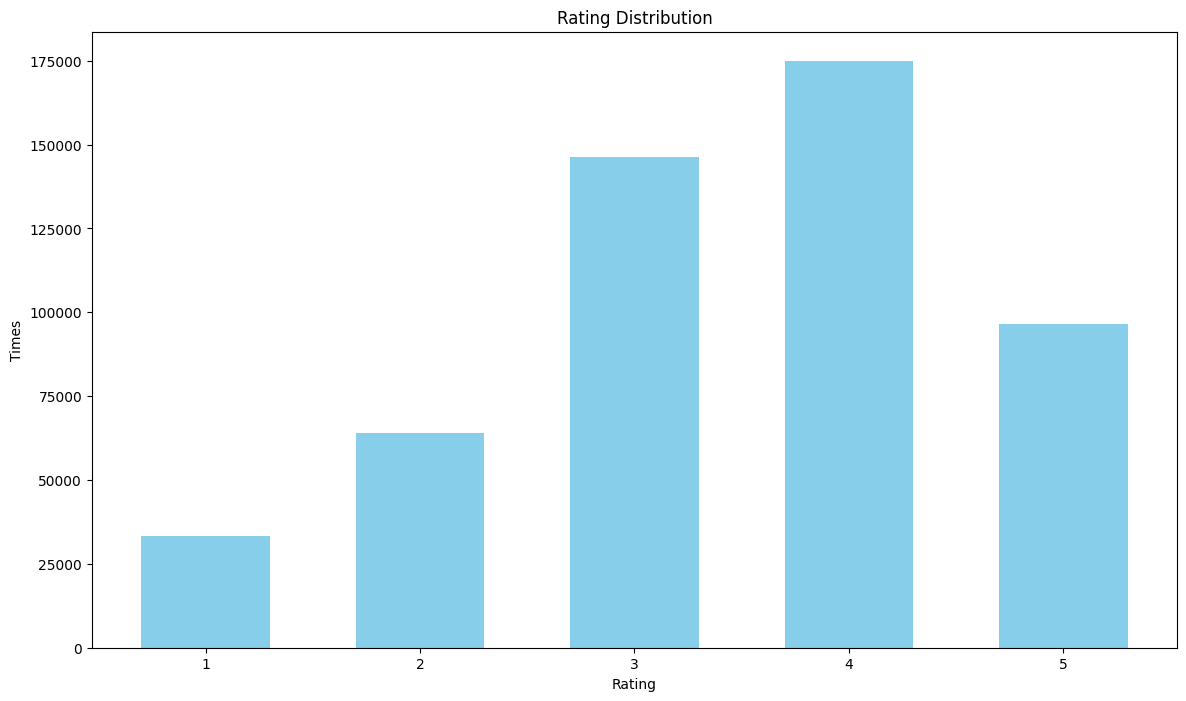

In [ ]:
rating_cnt = {}
for x in ratings.rating.tolist():
  if x not in rating_cnt:
    rating_cnt[x] = 1
  else:
    rating_cnt[x] += 1

plt.figure(figsize=(14, 8))
plt.bar(rating_cnt.keys(), rating_cnt.values(), color='skyblue', width=0.6)
plt.xlabel('Rating')
plt.ylabel('Times')
plt.title('Rating Distribution')

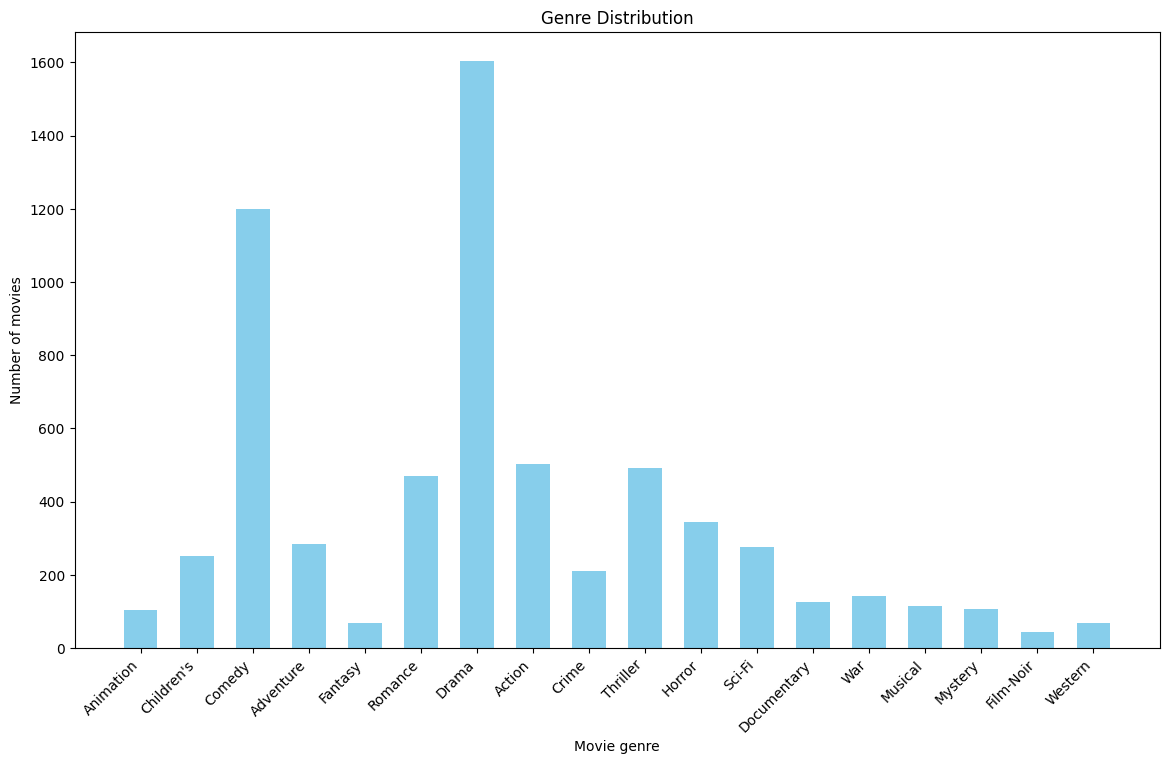

In [ ]:
genre_cnt = {}

for gens in movies.genre.tolist():
  for x in gens:
    if x in genre_cnt:
      genre_cnt[x] += 1
    else:
      genre_cnt[x] = 1

plt.figure(figsize=(14, 8))
plt.bar(genre_cnt.keys(), genre_cnt.values(), color='skyblue', width=0.6)
plt.xlabel('Movie genre')
plt.ylabel('Number of movies')
plt.title('Genre Distribution')

plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
import random
bundle_dict = {}
user_bundle = {}
random.seed(2024)

with open('bundle_item.txt', 'w') as f2, open('user_bundle_train.txt', 'w') as f3, open('user_bundle_tune.txt', 'w') as f4, open('user_bundle_test.txt', 'w') as f5:
  for user in tqdm(user_list):
    bundles = []
    # for week in new_ratings[new_ratings.useridn == user].week.unique():
    # for genre in genres:
      # bundle = ratings[(ratings.userid == user) & (ratings[f'{genre}'] == 1)].movieid.unique()
    bundle = ratings[(ratings.userid == user) & (ratings.fav == 1)].movieid.unique()
    bundle.sort()

    if 5 <= len(bundle) <= 10:
      bundle = tuple(bundle)
      if bundle not in bundle_dict:
        bundle_dict[bundle] = len(bundle_dict)
        for item in bundle:
          f2.write(f'{bundle_dict[bundle]}\t{item}\n')
      bundles.append(bundle_dict[bundle])
    elif 10 < len(bundle) < 150:
      for i in range(0, len(bundle), 10):
        tmp_bun = tuple(bundle[i:i+10])
        if len(tmp_bun) >= 5 and tmp_bun not in bundle_dict:
          bundle_dict[tmp_bun] = len(bundle_dict)
          for item in tmp_bun:
            f2.write(f'{bundle_dict[tmp_bun]}\t{item}\n')
          bundles.append(bundle_dict[tmp_bun])

    random.shuffle(bundles)
    user_bundle[user] = bundles
    # if len(bundles) >= 1:
    for bundle in bundles[:int(0.6*len(bundles))]:
      f3.write(f'{user}\t{bundle}\n')

    for bundle in bundles[int(0.6*len(bundles)):int(0.8*len(bundles))]:
      f4.write(f'{user}\t{bundle}\n')

    for bundle in bundles[int(0.8*len(bundles)):]:
      f5.write(f'{user}\t{bundle}\n')

100%|██████████| 1000/1000 [00:02<00:00, 470.67it/s]


In [ ]:
len(bundle_dict)

1463

In [ ]:
len(movies_list)

3416

In [ ]:
!mkdir data
import numpy as np
import pandas as pd
import scipy.sparse as sp
import torch
from sklearn.preprocessing import LabelEncoder

bi = pd.read_csv('bundle_item.txt', sep="\t", names=['b', 'i'])
ui = pd.read_csv('user_item.txt', sep="\t", names=['u', 'i'])
ub_train = pd.read_csv('user_bundle_train.txt', sep="\t", names=['u', 'b'])
ub_test = pd.read_csv('user_bundle_test.txt', sep="\t", names=['u', 'b'])
ub_valid = pd.read_csv('user_bundle_tune.txt', sep="\t", names=['u', 'b'])

num_u = ui['u'].nunique()
num_b = bi['b'].nunique()
num_i = bi['i'].nunique()
num_iu = ui['i'].nunique()
bi_idx = bi.to_numpy()
bi_graph = torch.sparse_coo_tensor(
    indices=torch.tensor([bi_idx[:, 0], bi_idx[:, 1]]),
    values=np.ones(len(bi)),
    size=(num_b, num_iu),
)
intersect = bi_graph @ bi_graph.T
mask = torch.eye(num_b)

total_item = bi_graph.sum(dim=1)
total_item = total_item.to_dense()
total_item_a = total_item.view(-1, 1)
total_item_b = total_item.view(1, -1)

total_overlap = total_item_a + total_item_b
inter_non_eye = intersect - intersect * mask
total_overlap_non_eye = total_overlap - total_overlap * mask + mask
total_not_overlap = total_overlap_non_eye - inter_non_eye
jaccard_pair_bundle = inter_non_eye.to_dense() / total_not_overlap
eli = (jaccard_pair_bundle >= 0.5).nonzero()
eli_unique = eli[:, 0].unique()
ub = pd.concat([ub_train, ub_test, ub_valid])
bi_fil = bi[~bi['b'].isin(eli_unique.tolist())]
ub_train_fil = ub_train[~ub_train['b'].isin(eli_unique.tolist())]
ub_test_fil = ub_test[~ub_test['b'].isin(eli_unique.tolist())]
ub_valid_fil = ub_valid[~ub_valid['b'].isin(eli_unique.tolist())]
ub_all  = pd.concat([ub_train_fil, ub_test_fil, ub_valid_fil])
ub_all = ub_all.sample(frac=1)
train_idx = int(len(ub_all) * 0.7)
valid_idx = int(len(ub_all) * 0.8)
ub_train_fil = ub_all[:train_idx]
ub_valid_fil = ub_all[train_idx:valid_idx]
ub_test_fil = ub_all[valid_idx:]
ub_train_fil.to_csv("data/user_bundle_train.txt", sep="\t", index=False, header=False)
ub_test_fil.to_csv("data/user_bundle_test.txt", sep="\t", index=False, header=False)
ub_valid_fil.to_csv("data/user_bundle_valid.txt", sep="\t", index=False, header=False)
bi_fil.to_csv("data/bundle_item.txt", sep="\t", index=False, header=False)

<ipython-input-24-129e630aae3f>:20: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  indices=torch.tensor([bi_idx[:, 0], bi_idx[:, 1]]),
<ipython-input-24-129e630aae3f>:24: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  intersect = bi_graph @ bi_graph.T


In [ ]:
len(eli_unique)

1957

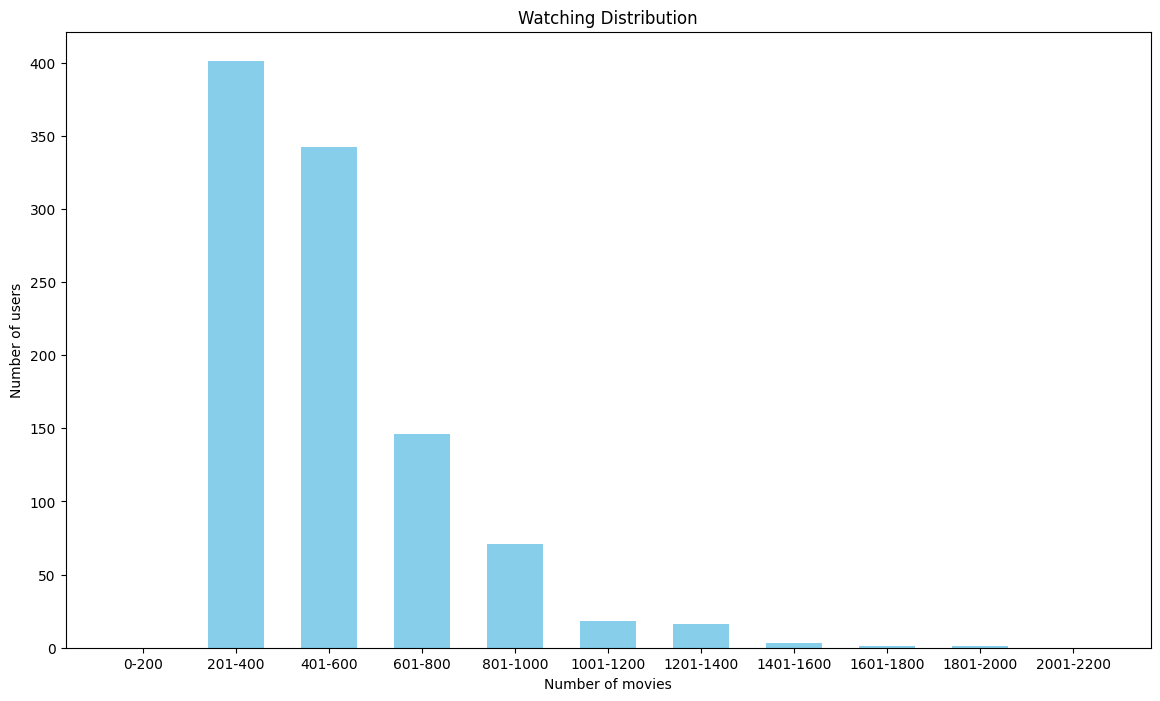

In [ ]:
# ui_ = {item: 0 for item in ratings.movieid.unique()}
# for item in ratings.movieid.unique():
#   for user in user_list:
#     if item in ui[user]:
#       ui_[item] += 1

# plt.figure(figsize=(18, 10))
# plt.bar(ui_.keys(), ui_.values())
# plt.xlabel('Number of interactions of a movie')
# plt.ylabel('Number of movies')
# plt.show()
index_ranges = [(0, 200), (201, 400), (401, 600), (601, 800), (801, 1000), (1001, 1200), (1201, 1400), (1401, 1600), (1601, 1800), (1801, 2000), (2001, 2200)]
movies_cnt = [0] * len(index_ranges)
for user, item in ui.items():
    for i, (start, end) in enumerate(index_ranges):
        if start <= len(item) <= end:
            movies_cnt[i] += 1
            break

x_labels = [f"{start}-{end}" for start, end in index_ranges]

plt.figure(figsize=(14, 8))
plt.bar(x_labels, movies_cnt, color='skyblue', width=0.6)
plt.xlabel('Number of movies')
plt.ylabel('Number of users')
plt.title('Watching Distribution')
plt.show()

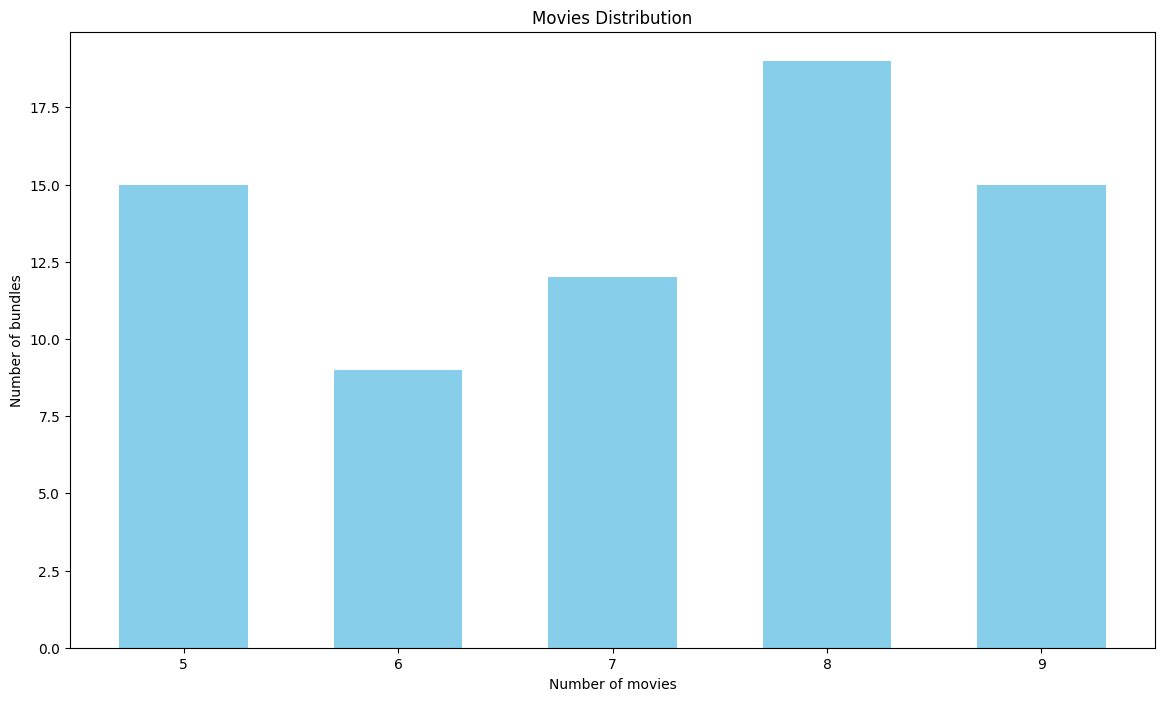

In [ ]:
# bi_dict = {}

# for b, idx in bundle_dict.items():
#   if len(b) not in bi_dict:
#     bi_dict[len(b)] = 0
#   else:
#     bi_dict[len(b)] += 1

# plt.figure(figsize=(18, 10))
# plt.bar(bi_dict.keys(), bi_dict.values())
# plt.xlabel('Number of items in a bundle')
# plt.ylabel('Number of bundles')
# plt.show()
index_ranges = [x for x in range(5, 10)]
movies_cnt = [0] * len(index_ranges)
for bun, idx in bundle_dict.items():
    for i, x in enumerate(index_ranges):
        if len(bun) == x:
            movies_cnt[i] += 1
            break

x_labels = [x for x in index_ranges]

plt.figure(figsize=(14, 8))
plt.bar(x_labels, movies_cnt, color='skyblue', width=0.6)
plt.xlabel('Number of movies')
plt.ylabel('Number of bundles')
plt.title('Movies Distribution')
plt.show()

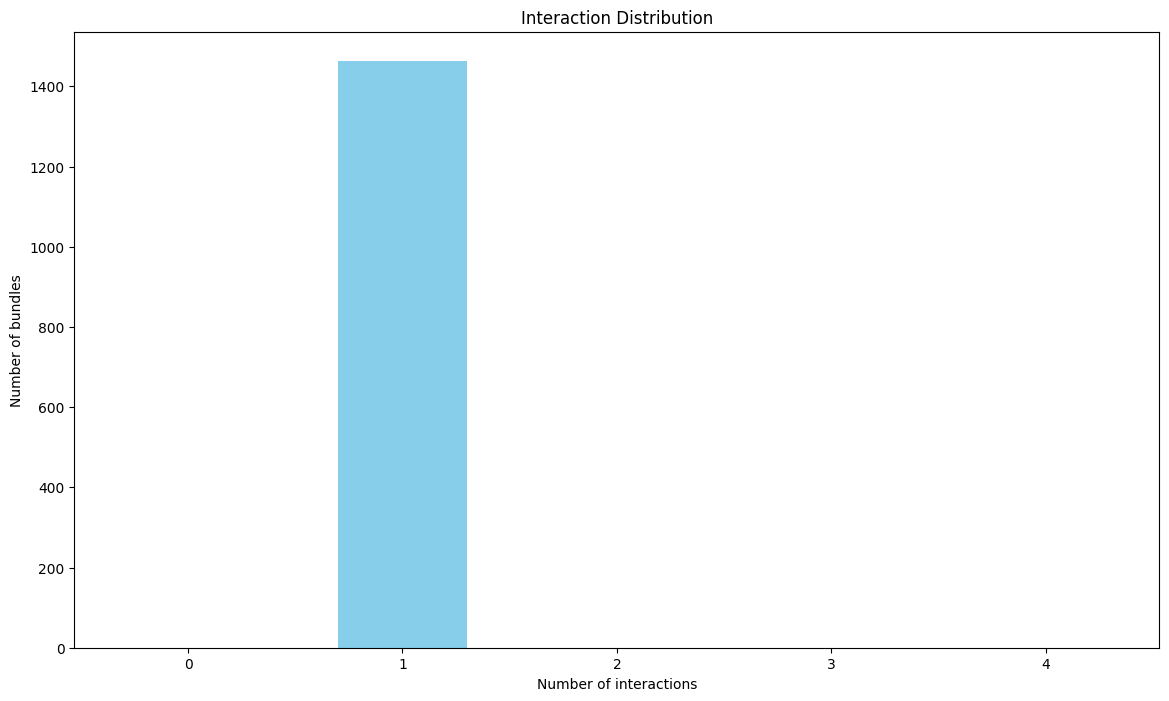

In [ ]:
# ub_dict = {}
# for u, b in user_bundle.items():
#   if len(b) not in ub_dict:
#     ub_dict[len(b)] = 1
#   else:
#     ub_dict[len(b)] += 1

# plt.figure(figsize=(18, 10))
# plt.bar(ub_dict.keys(), ub_dict.values())
# plt.xlabel('Number of bundles an user watched')
# plt.ylabel('Number of users')
# plt.show()
buns = [0] * len(bundle_dict)
for user, bun in user_bundle.items():
  for x in bun:
    buns[x] += 1

x_labels = [x for x in range(5)]
bun_cnt = [0] * 5
for i, x in enumerate(buns):
  for idx, cnt in enumerate(x_labels):
    if x == cnt:
      bun_cnt[idx] += 1
      break

plt.figure(figsize=(14, 8))
plt.bar(x_labels, bun_cnt, color='skyblue', width=0.6)
plt.xlabel('Number of interactions')
plt.ylabel('Number of bundles')
plt.title('Interaction Distribution')
plt.show()

In [ ]:
bun_cnt

[0, 1463, 0, 0, 0]

In [ ]:
bu_dict = {}

for b, idx in bundle_dict.items():
  for user in user_list:
    if idx not in user_bundle[user]:
      bu_dict[idx] = 1
    else:
      bu_dict[idx] += 1

bun_interact = {}
for bun, cnt in bu_dict.items():
  if cnt not in bun_interact:
    bun_interact[cnt] = 1
  else:
    bun_interact[cnt] += 1

plt.figure(figsize=(18, 10))
plt.bar(bun_interact.keys(), bun_interact.values())
plt.xlabel('Number of times a bundle has been watched')
plt.ylabel('Number of bundles')
plt.show()

In [ ]:
# norm = movies.movieid_norm.unique()
# with open('/content/drive/MyDrive/ml-1m/movieid_lookup.txt', 'w') as f:
#   for id in tqdm(norm):
#     f.write(f'{id}\t{movies[movies.movieid_norm==id].movieid}\n')


100%|██████████| 3883/3883 [00:02<00:00, 1456.79it/s]
